# Datos del estudiante:
**Nombre:** Nery Fuentes

**Carne:** 15004337

**Curso:** Ciencia de Datos con Python

**Sección:** U


# Proyecto
Consiste en crear modelos predictivos de regresión lineal uni-variable de la forma:

y = β0 + β1 ∗ x

Donde:

- y es la variable dependiente,
- x es la variable independiente,
- β0 es el intercepto de la recta,
- β1 es la pendiente de la recta.

### Importación de librerías

In [247]:
# IMPORTACION DE LIBRERIAS 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
#from sklearn import datasets, linear_model

### Impotación del archivo

In [2]:
# IMPORTACION DEL ARCHIVO
directorio =r"./data/proyecto_training_data.npy"
datos = np.load(directorio)

# CREAR DATA SET
dataSet = pd.DataFrame(datos)

#COLOCAR ENCABEZADOS PARA EL DATASET
nombre_col = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
dataSet.columns = nombre_col

### Vista previa del DataSet

In [3]:
#VISTA PREVIA DEL DATASET
dataSet.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


### Datos estadísticos del DataSet

In [4]:
dataSet.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


### Revisión de la cantidad de registros y columnas

In [5]:
# CONTAR CANTIDAD DE FILAS Y COLUMNAS DEL DATASET
dataSet.shape

(1460, 6)

### Crear Sets de entrenamiento y validación

In [7]:
#Identificar cantidad de registros
num_filas = len(dataSet)

#80% del dataset(filas) se usara para todo el proceso de entrenamiento
num_filas_setEntrena= int(num_filas*0.8)


In [18]:
# CREAR SET DE ENTRANMIENTO
setEntrena=dataSet.iloc[0:num_filas_setEntrena,:].copy()

# CONTAR FILAS DEL SET DE ENTRANMIENTO
setEntrena.shape

(1168, 9)

In [19]:
#CREAR SET DE VALIDACION
setValidacion=dataSet.iloc[num_filas_setEntrena:,:].copy()

#CONTAR FILAS DEL SET DE VALIDACION
setValidacion.shape

(292, 9)

### Validación de cantidad de registros de ambos Sets

In [10]:
# VALIDAR QUE LOS SETS ESTEN COMPLETOS
len(setEntrena) + len(setValidacion) == num_filas

True

### Análisis exploratorio de cada columna

--------------------------------------
Columna: SalePrice
--------------------------------------
Media:  180590.27739726027
Maximo:  755000.0
Minimo:  34900.0
Desviacion Standar: 78815.69790179149
Rango peak to peak: 720100.0
Valores Nulos:  0



C:\Users\XPRS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


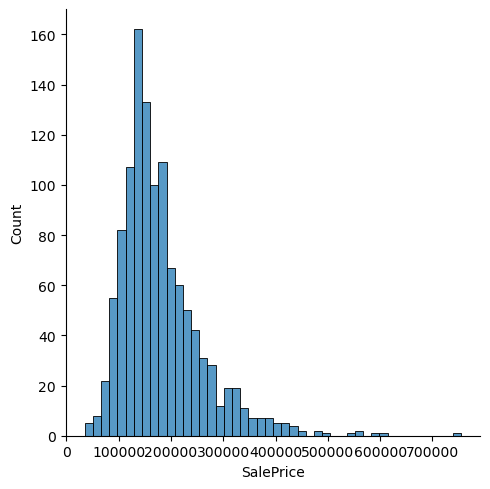


--------------------------------------
Columna: OverallQual
--------------------------------------
Media:  6.101027397260274
Maximo:  10.0
Minimo:  1.0
Desviacion Standar: 1.3780252276191631
Rango peak to peak: 9.0
Valores Nulos:  0



C:\Users\XPRS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


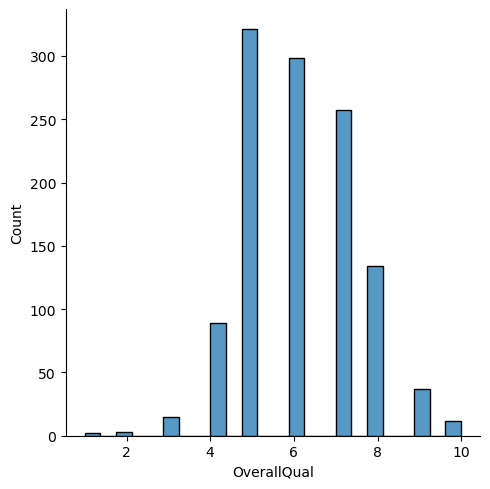


--------------------------------------
Columna: 1stFlrSF
--------------------------------------
Media:  1156.3236301369864
Maximo:  3228.0
Minimo:  334.0
Desviacion Standar: 373.7803744886528
Rango peak to peak: 2894.0
Valores Nulos:  0



C:\Users\XPRS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


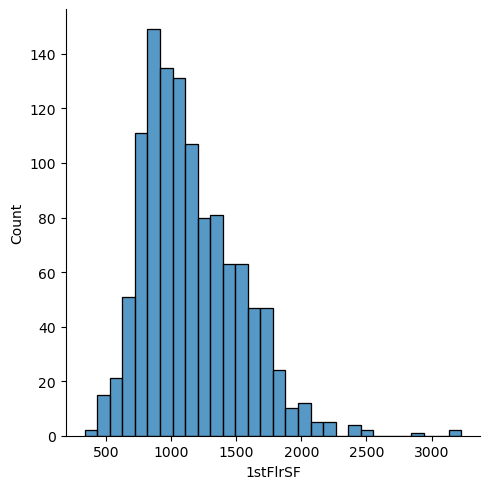


--------------------------------------
Columna: TotRmsAbvGrd
--------------------------------------
Media:  6.4854452054794525
Maximo:  14.0
Minimo:  2.0
Desviacion Standar: 1.6091407087243883
Rango peak to peak: 12.0
Valores Nulos:  0



C:\Users\XPRS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


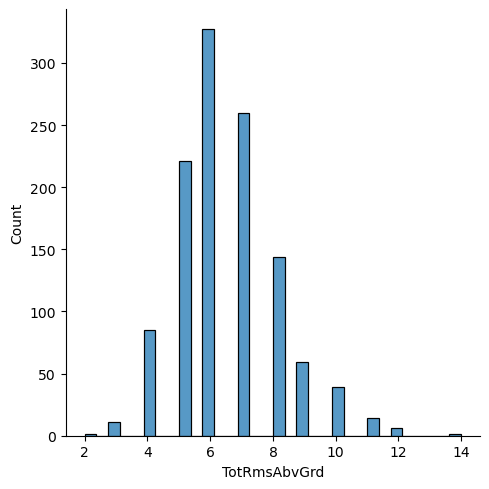


--------------------------------------
Columna: YearBuilt
--------------------------------------
Media:  1971.451198630137
Maximo:  2010.0
Minimo:  1875.0
Desviacion Standar: 29.95170660645528
Rango peak to peak: 135.0
Valores Nulos:  0



C:\Users\XPRS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


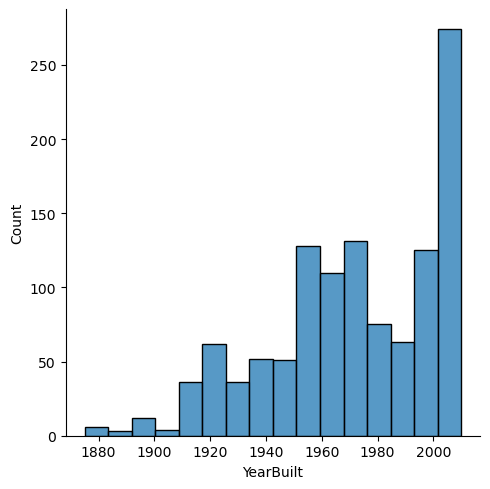


--------------------------------------
Columna: LotFrontage
--------------------------------------
Media:  69.94698544698545
Maximo:  313.0
Minimo:  21.0
Desviacion Standar: 23.478160779049645
Rango peak to peak: nan
Valores Nulos:  206



C:\Users\XPRS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


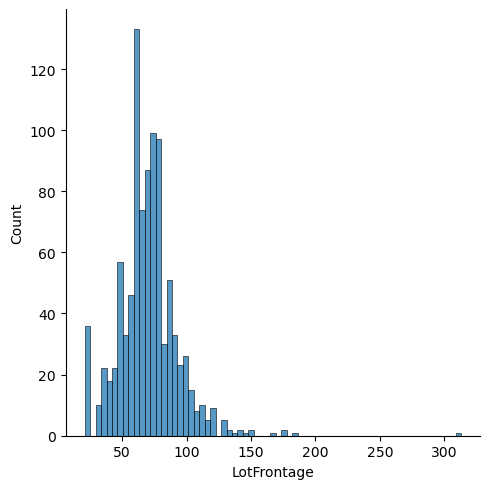

In [12]:
#ANALISIS EXPLORATORIO DE LOS DATOS 

for col in setEntrena.columns:
    dtExploratorios = setEntrena[col].describe()
    print("--------------------------------------")
    print(f"Columna: {col}")
    print("--------------------------------------")
    #print(dtExploratorios)
    print("Media: ",dtExploratorios["mean"])
    print("Maximo: ",dtExploratorios["max"])
    print("Minimo: ",dtExploratorios["min"])
    print("Desviacion Standar:",dtExploratorios["std"])
    print("Rango peak to peak:",np.ptp(setEntrena[col]))
    print("Valores Nulos: ", setEntrena[col].isnull().sum())
    print()
    
    #GRAFICAR HISTOGRAMA
    
    sns.displot(setEntrena[col])
    plt.show()
    
    print()

### Calculo de correlación

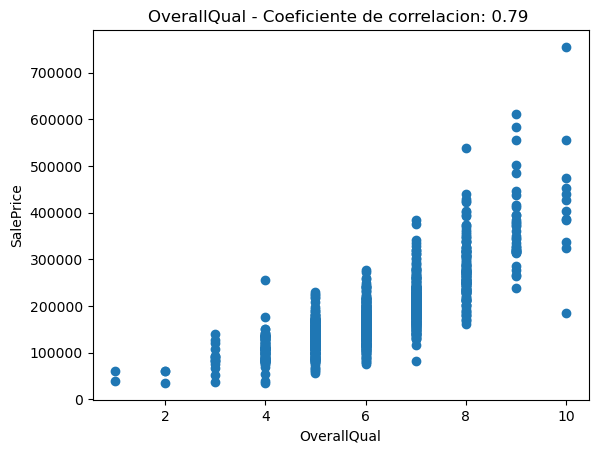

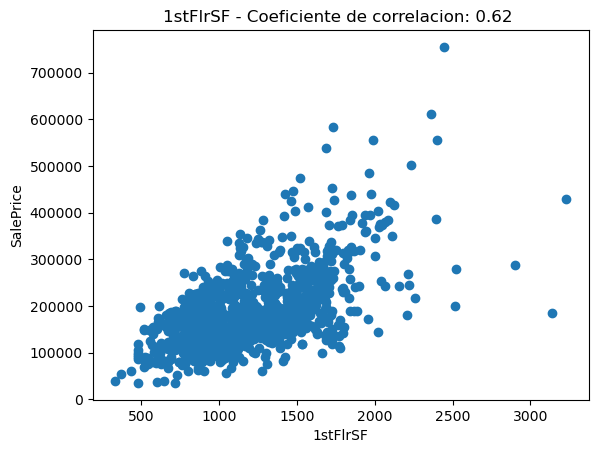

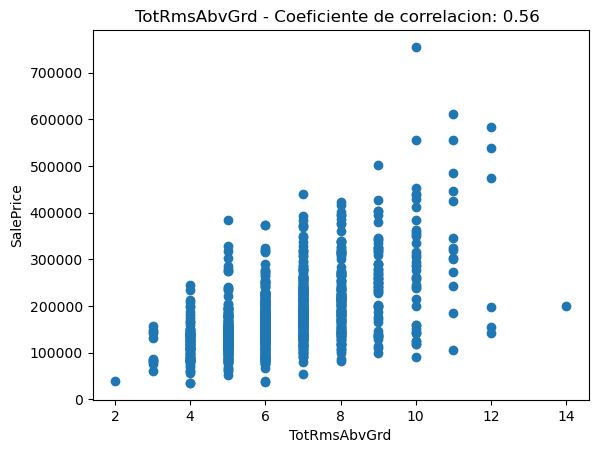

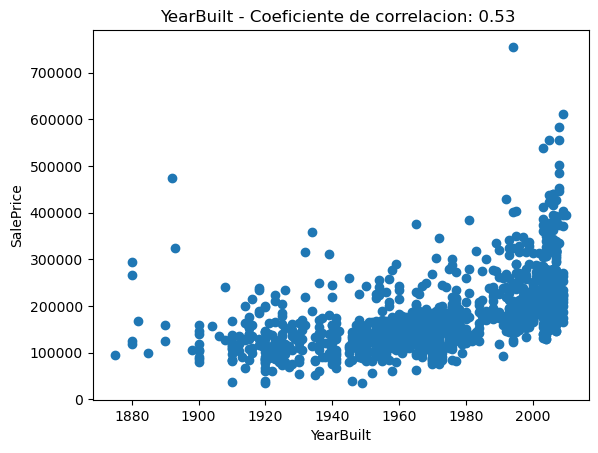

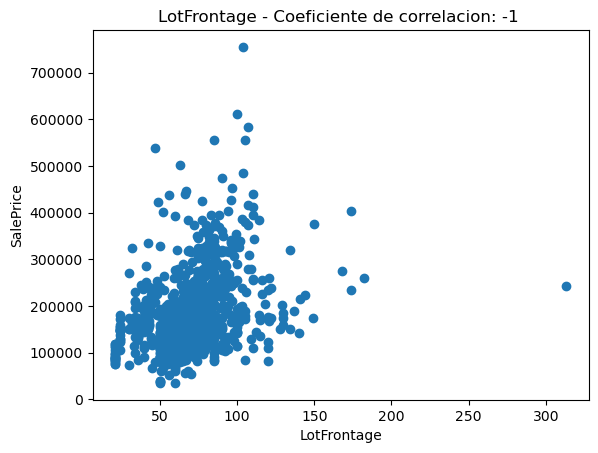

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage,y_,x_,xy
0,208500.0,7.0,856.0,8.0,2003.0,65.0,27909.722603,-4.946985,-136431.942575
1,181500.0,6.0,1262.0,6.0,1976.0,80.0,909.722603,10.053015,5818.726137
2,223500.0,7.0,920.0,6.0,2001.0,68.0,42909.722603,-1.946985,-82900.311951
3,140000.0,7.0,961.0,7.0,1915.0,60.0,-40590.277397,-9.946985,407042.539995
4,250000.0,8.0,1145.0,9.0,2000.0,84.0,69409.722603,14.053015,970765.439457


In [44]:
#FUNCION PARA OBTENER DATOS NECESARIOS PARA CALCULAR CORRELACION
def estadisticos_col(df,col):
    estds=df[col].describe()
    media = estds["mean"]
    std=estds["std"]        
    conteo =estds["count"]
    
    return media, std, conteo

# diccionario para guardar las correlaciones
listCorrelaciones ={}

# GRAFICAR X y Y con scatterPlot
var_y='SalePrice'

mediaY, stdY, conteoY=estadisticos_col(setEntrena,var_y)
setEntrena["y_"]=setEntrena[var_y]-mediaY


# CALCULAR COEFICIENTE PARA COLUMNA 
for col in setEntrena:
    if col not in( var_y, "y_","x_","xy") :
        #print(col)
        mediaX, stdX, conteoX=estadisticos_col(setEntrena,col)
        setEntrena["x_"]=setEntrena[col]-mediaX
        setEntrena["xy"]=setEntrena["x_"]* dataSet["y_"]
        
        
        sumaXY=setEntrena["xy"].sum()
        coeficiente=-1
        if (conteoY>0 ) and (conteoX==conteoY):
            coeficiente = sumaXY/( (conteoX-1) * stdX* stdY )
            
        #print("coeficiente ", coeficiente)
        listCorrelaciones[col]= coeficiente
        
        plt.scatter(setEntrena[col], setEntrena[var_y] )
        plt.xlabel(col)
        plt.ylabel(var_y)
        plt.title(f"{col} - Coeficiente de correlacion: {round(coeficiente,2)  } ") 
        plt.show()
        

setEntrena.head()

### Resumen de correlaciones

In [45]:
#ORDENAR LISTADO DE CORRELACIONES
listCorrelaciones = dict(sorted(listCorrelaciones.items(), key=lambda item:item[1], reverse=True))
listado = [elem for elem in listCorrelaciones.values()]

print("Resumen de correlaciones")
print()
for nom, valor in listCorrelaciones.items():
    print(nom," : ", round(valor,2))


Resumen de correlaciones

OverallQual  :  0.79
1stFlrSF  :  0.62
TotRmsAbvGrd  :  0.56
YearBuilt  :  0.53
LotFrontage  :  -1


### Entrenar  modelo de regresión lineal

#### Creacion de clase para entrenamiento
y = β0+β1 ∗x.

In [241]:
class EntrenamientoModelo:
    #ATRIBUTOS
    colX=np.array(0)
    colY=np.array(0)
    epochs=0
    imprimir_error_cada=0
    learning_rate=0
    betas = np.zeros(2)
    errores =[]
    nombre=""
    
    #CONSTRUCTOR
    def __init__(self, x,y,epochs, errors, lr,nombre):
        self.colX=x
        self.colY=y
        self.epochs=epochs
        self.imprimir_error_cada=errors
        self.learning_rate=lr
        self.nombre=nombre

    #METODOS
    def entrenar(self):
        
        for i in range(self.epochs):
            # se crea matriz con los valores x y una columna con valores 1
            matriz_x=  np.column_stack((self.colX, np.ones_like(self.colX)))

            # se calcula la prediccion de y
            prediccion_y =np.reshape( np.dot(matriz_x, self.betas) ,(-1,1))
            #print("matriz",matriz_x)

            # se calcula el error
            error = 1/(2*self.colY.shape[0]) * sum((self.colY - prediccion_y)**2)
            
            #almacenar Errores
            self.errores=np.append(self.errores,error)
            
            #calcular gradiente
            gradiente=(1/self.colY.shape[0]* sum((prediccion_y -  self.colY)*  matriz_x ))
            
            #actualizar betas
            self.betas -= self.learning_rate*gradiente

        
    def graficarErrores(self):
        fig, ax = plt.subplots()
        x =np.arange(self.epochs)
        ax.plot(x, self.errores, linewidth=2.0)
        plt.title(f"Grafico de errores de: {self.nombre}")
        plt.xlabel("Iteracion")
        plt.ylabel("Errores")
        plt.show
        #print(self.errores)
    def getX(self):
        return(self.epochs)



### Ejecucion de entrenamiento para la columna OverallQual

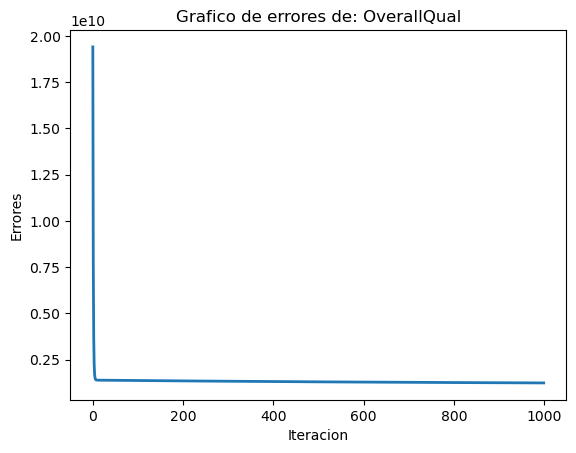

In [242]:
x_1 = np.reshape(setEntrena["OverallQual"],(-1,1))
y_1 = np.reshape(setEntrena["SalePrice"],(-1,1))


modelo1 = EntrenamientoModelo(x_1,y_1,1000,2,0.01,"OverallQual")

modelo1.entrenar()
modelo1.graficarErrores()

### Ejecucion de entrenamiento para la columna OverallQual

C:\Users\XPRS\AppData\Local\Temp\ipykernel_7176\521617917.py:33: RuntimeWarning: overflow encountered in add
  error = 1/(2*self.colY.shape[0]) * sum((self.colY - prediccion_y)**2)
C:\Users\XPRS\AppData\Local\Temp\ipykernel_7176\521617917.py:33: RuntimeWarning: overflow encountered in square
  error = 1/(2*self.colY.shape[0]) * sum((self.colY - prediccion_y)**2)
C:\Users\XPRS\AppData\Local\Temp\ipykernel_7176\521617917.py:39: RuntimeWarning: overflow encountered in add
  gradiente=(1/self.colY.shape[0]* sum((prediccion_y -  self.colY)*  matriz_x ))
C:\Users\XPRS\AppData\Local\Temp\ipykernel_7176\521617917.py:42: RuntimeWarning: invalid value encountered in subtract
  self.betas -= self.learning_rate*gradiente


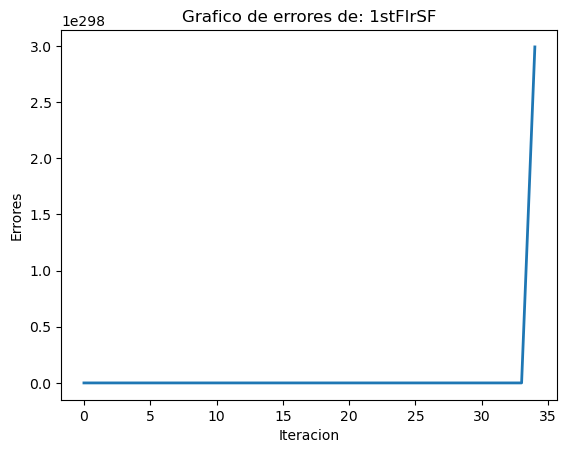

In [243]:
colName="1stFlrSF"
x_2 = np.reshape(setEntrena[colName],(-1,1))
y_2 = np.reshape(setEntrena["SalePrice"],(-1,1))


modelo2 = EntrenamientoModelo(x_2,y_2,1000,2,0.01,colName)

modelo2.entrenar()
modelo2.graficarErrores()

### Entrenamiento con Sklearn